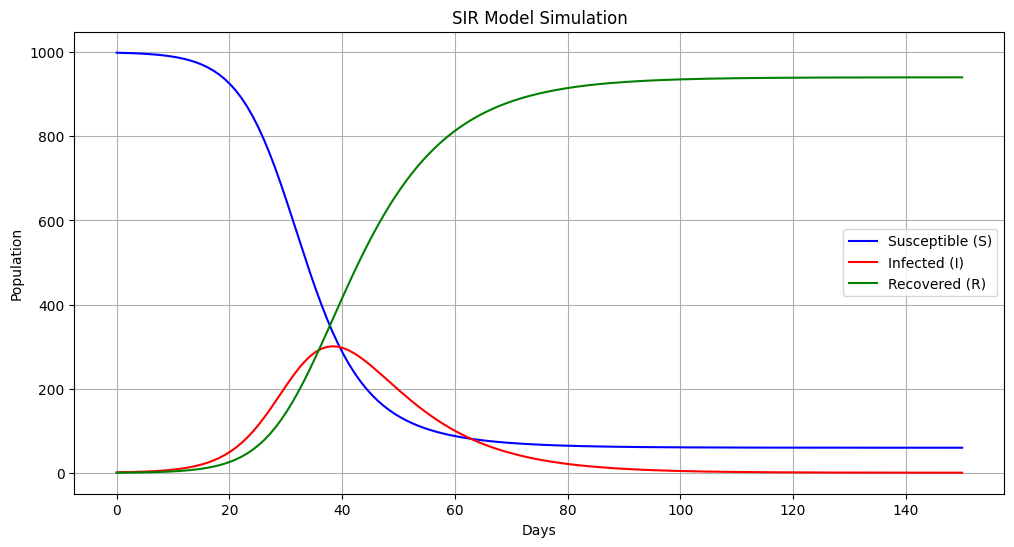

The peak of infection occurs on day 38.26.
The basic reproductive number R0 is 0.003.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Differential equations
def sir_model(y, t, beta, gamma):
    S, I, R = y
    N = S + I + R  # Total
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    
    return [dS_dt, dI_dt, dR_dt]

# Initial
N = 1000
S0 = 999  # Susceptible individuals
I0 = 1    # Infected individuals
R0 = 0    # Recovered individuals
beta = 0.3 * 10**-3  # Transmission rate
gamma = 0.1         # Recovery rate

# Initial state vector
y0 = [S0, I0, R0]

# Time
t = np.linspace(0, 150, 150)

# Solve the equations
result = odeint(sir_model, y0, t, args=(beta, gamma))

S, I, R = result.T

# Plot
plt.figure(figsize=(12, 6))
plt.plot(t, S, label='Susceptible (S)', color='blue')
plt.plot(t, I, label='Infected (I)', color='red')
plt.plot(t, R, label='Recovered (R)', color='green')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SIR Model Simulation')
plt.legend()
plt.grid()
plt.show()

# Calculations
I_peak_day = t[np.argmax(I)]
R0_value = beta / gamma

print(f"The peak of infection occurs on day {I_peak_day:.2f}.")
print(f"The basic reproductive number R0 is {R0_value:.3f}.")

### Analysis and Interpretation of the SIR Model Results

#### i. Infection Peak
- **Peak Identification**: In your graph, the number of infected individuals (represented by the red curve) reaches its maximum around day 40.
- **Factors Contributing to the Peak**: The infection peak occurs due to the balance between the rate of new infections and the rate of recovery. The infection increases until the number of susceptible individuals drops enough that the infection rate ($$\beta \times S$$) can no longer sustain growth, leading to more recoveries than new infections.

#### ii. Basic Reproductive Number ($$R_0$$)
- **Calculation**:
  $$
  R_0 = \frac{\beta}{\gamma}
  $$
  Given:
  - $\beta = 0.3 \times 10^{-3}$
  - $\gamma = 0.1$
  
  Calculation:
  $$
  R_0 = \frac{0.3 \times 10^{-3}}{0.1} = 0.003
  $$

- **Interpretation**: An $R_0$ of 0.003 indicates that, on average, each infected person transmits the disease to 0.003 others when the population is fully susceptible. This value suggests rapid disease recovery. If $R_0 > 1$, the disease will continue to spread, while if $R_0 < 1$, the infection will eventually die out.

#### iii. Pandemic Dynamics
- **General Behavior**:
  - **Susceptible (S)**: The number of susceptible individuals (blue curve) starts at the initial maximum and decreases steadily as more individuals get infected.
  - **Infected (I)**: The infected population (red curve) rises quickly, peaking around day 40, and then falls as more individuals recover.
  - **Recovered (R)**: The recovered population (green curve) begins at zero and increases over time, eventually stabilizing as the number of new infections drops.

- **Interactions and Dynamics**: The initial phase of the pandemic sees a rapid rise in $I$ as $S$ is high. As the infection spreads, $S$ decreases, reducing the number of new infections. Eventually, $I$ decreases while $R$ continues to grow, signaling that the pandemic is reaching containment.

This analysis demonstrates the spread and control of the pandemic, highlighting the role of $R_0$ in public health strategies and the importance of measures like vaccination and social distancing to control the infection.

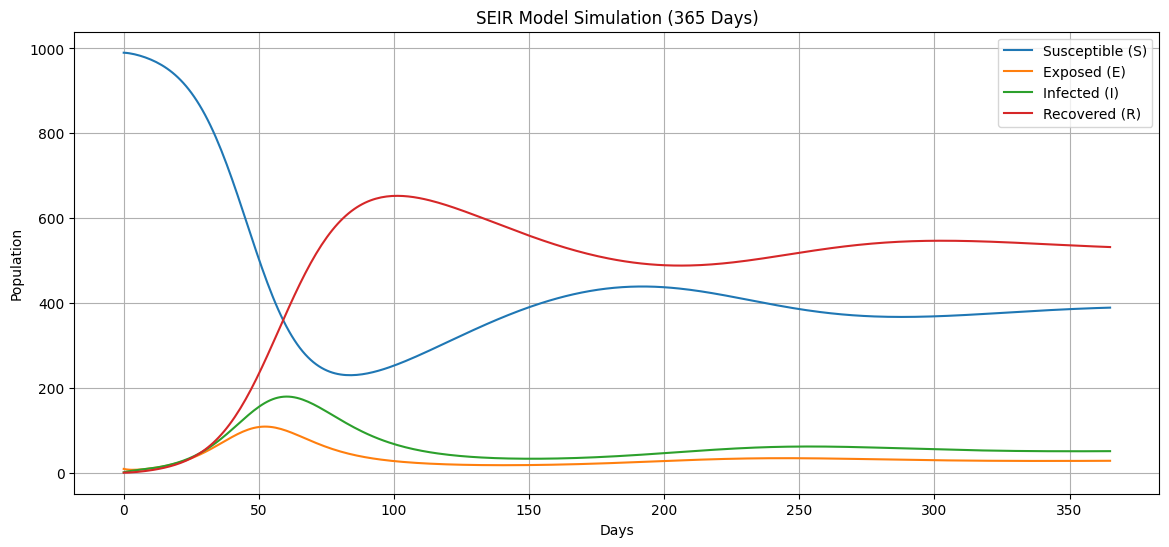

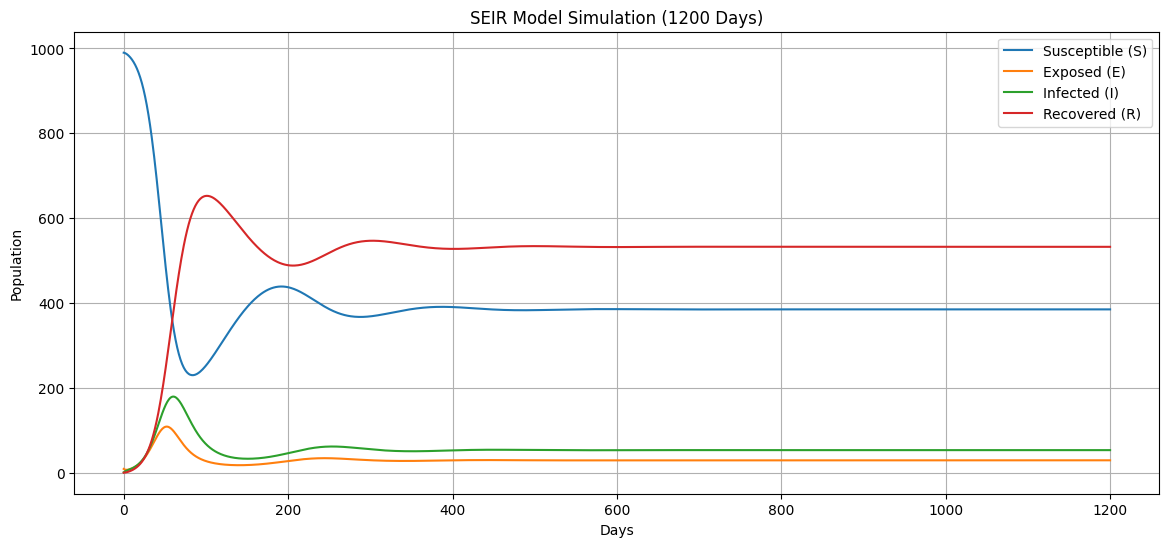

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Differential equations
def seir_model(y, t, beta, sigma, gamma, mu, N):
    S, E, I, R = y
    dS_dt = mu * N - beta * S * I - mu * S
    dE_dt = beta * S * I - (sigma + mu) * E
    dI_dt = sigma * E - (gamma + mu) * I
    dR_dt = gamma * I - mu * R
    return [dS_dt, dE_dt, dI_dt, dR_dt]

# Initial
N = 1000
S0 = 990
E0 = 9
I0 = 1
R0 = 0
y0 = [S0, E0, I0, R0]

beta = 0.3e-3
gamma = 0.1
sigma = 0.2
mu = 0.01

# Time
t_365 = np.linspace(0, 365, 365)
t_1200 = np.linspace(0, 1200, 1200)

# Solve the equations
solution_365 = odeint(seir_model, y0, t_365, args=(beta, sigma, gamma, mu, N))
solution_1200 = odeint(seir_model, y0, t_1200, args=(beta, sigma, gamma, mu, N))
S_365, E_365, I_365, R_365 = solution_365.T
S_1200, E_1200, I_1200, R_1200 = solution_1200.T

# 365 days
plt.figure(figsize=(14, 6))
plt.plot(t_365, S_365, label='Susceptible (S)')
plt.plot(t_365, E_365, label='Exposed (E)')
plt.plot(t_365, I_365, label='Infected (I)')
plt.plot(t_365, R_365, label='Recovered (R)')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SEIR Model Simulation (365 Days)')
plt.legend()
plt.grid(True)
plt.show()

# 1200 days
plt.figure(figsize=(14, 6))
plt.plot(t_1200, S_1200, label='Susceptible (S)')
plt.plot(t_1200, E_1200, label='Exposed (E)')
plt.plot(t_1200, I_1200, label='Infected (I)')
plt.plot(t_1200, R_1200, label='Recovered (R)')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SEIR Model Simulation (1200 Days)')
plt.legend()
plt.grid(True)
plt.show()

### Analysis of SEIR Model Simulation Results

#### Pandemic Waves (Infection Patterns)
- **Observed Waves**: The simulation shows multiple waves of infections, especially over 1200 days. After an initial peak, the infection decreases but periodically resurges, creating waves.
- **Reasons**: The **exposed compartment (E)** and **birth/death rates (μ)** contribute to this pattern. The exposed stage delays infection spread, and births continually introduce new susceptibles, enabling waves of infection over time.

#### Effect of the Exposed Compartment (E)
- **Delay in Transmission**: The exposed stage adds a delay, moderating the infection’s immediate spread and leading to smoother waves instead of a sharp rise.

#### Effect of Birth/Death Rates (μ)
- **Sustained Dynamics**: Continuous births replenish the susceptible population, preventing full immunity in the population and allowing for recurring infection waves.

### Summary
The SEIR model with births and deaths provides a more realistic long-term view of pandemics, with cyclical infection waves due to the exposed phase and the introduction of new susceptibles. This underlines the need for sustained public health measures to manage recurring waves.


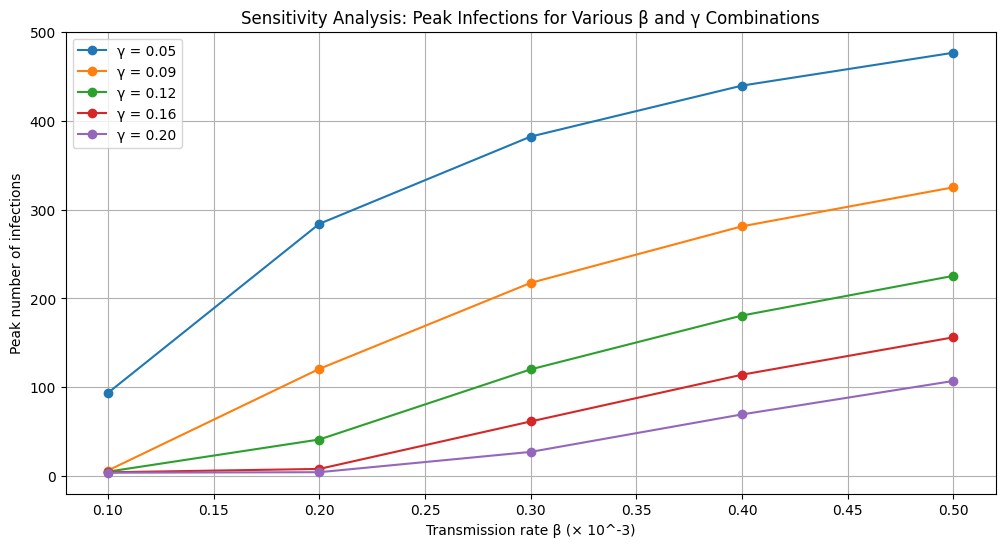

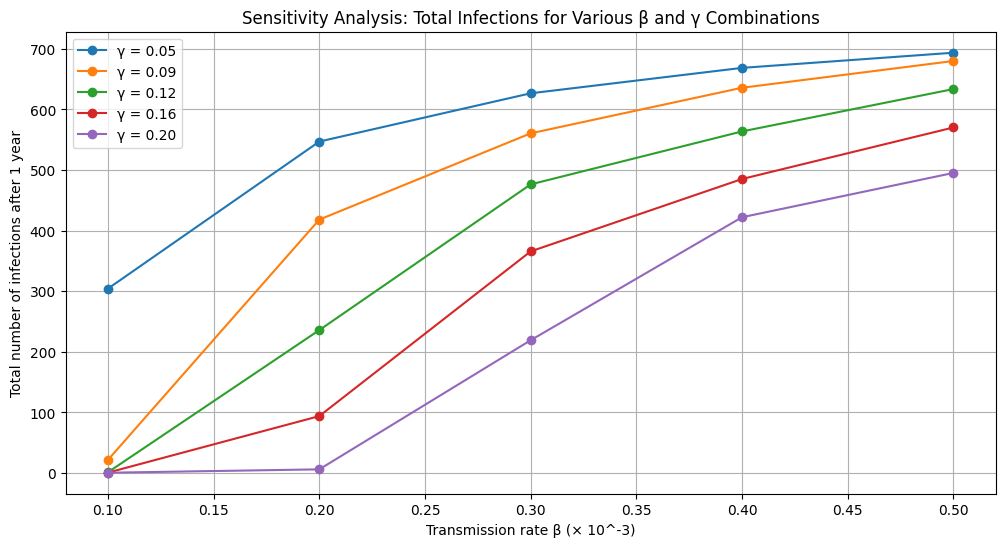

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Differential equations
def seir_model(y, t, beta, sigma, gamma, mu, N):
    S, E, I, R = y
    dS_dt = mu * N - beta * S * I - mu * S
    dE_dt = beta * S * I - (sigma + mu) * E
    dI_dt = sigma * E - (gamma + mu) * I
    dR_dt = gamma * I - mu * R
    return [dS_dt, dE_dt, dI_dt, dR_dt]

# Initial
N = 1000
S0 = 990
E0 = 9
I0 = 1
R0 = 0
y0 = [S0, E0, I0, R0]
sigma = 0.2
mu = 0.01
t = np.linspace(0, 365, 365)  # Time vector for 365 days

# Range of values
beta_values = np.linspace(0.1e-3, 0.5e-3, 5)
gamma_values = np.linspace(0.05, 0.2, 5)

# Store results
peak_infections = np.zeros((len(beta_values), len(gamma_values)))
total_infections = np.zeros((len(beta_values), len(gamma_values)))

# Sensitivity analysis
for i, beta in enumerate(beta_values):
    for j, gamma in enumerate(gamma_values):
        solution = odeint(seir_model, y0, t, args=(beta, sigma, gamma, mu, N))
        S, E, I, R = solution.T
        peak_infections[i, j] = max(I)  # Peak number of infections
        total_infections[i, j] = R[-1]  # Total recovered at the end of 365 days (approximation of total infections)

# Peak infections
plt.figure(figsize=(12, 6))
for j, gamma in enumerate(gamma_values):
    plt.plot(beta_values * 1e3, peak_infections[:, j], marker='o', label=f'γ = {gamma:.2f}')
plt.xlabel('Transmission rate β (× 10^-3)')
plt.ylabel('Peak number of infections')
plt.title('Sensitivity Analysis: Peak Infections for Various β and γ Combinations')
plt.legend()
plt.grid(True)
plt.show()

# Total infections
plt.figure(figsize=(12, 6))
for j, gamma in enumerate(gamma_values):
    plt.plot(beta_values * 1e3, total_infections[:, j], marker='o', label=f'γ = {gamma:.2f}')
plt.xlabel('Transmission rate β (× 10^-3)')
plt.ylabel('Total number of infections after 1 year')
plt.title('Sensitivity Analysis: Total Infections for Various β and γ Combinations')
plt.legend()
plt.grid(True)
plt.show()

### Sensitivity Analysis: Implications for Public Health Interventions

#### 1. **Transmission Rate (($\beta$)) and Social Distancing**
   - **Higher ($\beta$)** increases infection peaks and totals, showing faster and broader spread.
   - **Reducing ($\beta$) through social distancing** (e.g., reducing gatherings, enforcing mask use) lowers the peak, easing healthcare strain.

#### 2. **Recovery Rate (($\gamma$)) and Medical Treatments**
   - **Higher ($\gamma$)** (faster recovery) decreases both peak and total infections.
   - **Increasing ($\gamma$) with medical interventions** (e.g., treatments, hospital support) shortens the infectious period, limiting disease spread.

#### Summary
   - **Combined Strategy**: Social distancing (lower ($\beta$)) and medical support (higher ($\gamma$)) together can effectively control pandemic spread.
   - **Policy Recommendations**: Early social distancing and accessible medical treatments are key to minimizing peak and total infections.